In [4]:
import numpy as np
import modin.pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from src.model_selection import XGBGridSearch
import src.model_builder as mb
import src.data_handling as dh

In [3]:
%load_ext autoreload
%autoreload 2

## Input selection

In [9]:
genes = ["ESR1", "ERBB2", "CDK4"]

In [10]:
VS = dh.VariableSelector("Cancer")

In [11]:
VS.compute_corr(["ESR1", "ERBB2", "CDK4"], verbose=1)

In [12]:
datasets = {}

for gene in genes:
    datasets[gene] = {}
    print(gene)
    nan_share=0.2
    X, Y, datasets[gene]["alpha"] = VS.extract_data(gene, nan_limit=nan_share, select_n=1000, verbose=1)
    datasets[gene]["X_train"], datasets[gene]["X_test"], datasets[gene]["y_train"], datasets[gene]["y_test"] = train_test_split(X, Y, random_state=10)

ESR1
Selected 1002 input genes with alpha = 4e-19
ERBB2
Selected 999 input genes with alpha = 9e-14
CDK4
Selected 998 input genes with alpha = 9e-09


In [13]:
datasets["ESR1"]["X_train"]

Genes,FAM87B,RPL22,TNFRSF9,ENO1,PIK3CD-AS1,CASZ1,TNFRSF1B,PDPN,C1orf64,AKR7A3,...,TTC3,KCNJ15,FAM3B,TFF3,TFF1,ITGB2,LINC00315,COL18A1,COL6A1,COL6A2
sc5rJUQ064_GGGATGACAGCCAGAA,-0.040507,-2.981073,-0.077511,-0.539985,-0.004778,-0.364339,-0.156292,-0.082028,-0.325266,-0.671143,...,1.898622,-0.025446,-0.765579,-1.062341,-0.302562,-0.334146,0.020172,-0.438571,-0.386839,-0.453190
sc5rJUQ064_AACACGTGTAGGAGTC,-0.027225,0.669832,-0.055435,-0.732615,-0.008979,1.718793,-0.172866,-0.062008,-0.458159,-0.878003,...,-1.253620,-0.032419,0.636292,-0.590149,-0.419319,-0.245397,-0.007831,-0.362126,-0.299089,-0.353099
sc5rJUQ064_CAAGTTGTCTCTTATG,-0.025901,0.061817,-0.054697,-0.765161,-0.005598,1.827977,-0.186279,-0.056509,-0.467202,-0.872744,...,0.547933,-0.035644,1.448845,-0.531230,-0.398638,-0.229772,-0.016913,-0.365012,-0.292922,-0.349222
sc5rJUQ064_GCATGTACATCGATGT,-0.038889,0.638745,-0.075866,-0.572964,-0.002580,-0.384476,-0.166700,-0.077091,-0.338452,-0.677877,...,-0.978254,-0.028100,-0.783297,0.361282,-0.293728,-0.318502,0.012275,-0.436754,-0.377993,-0.445351
sc5rJUQ042_ACTTTCACAACTGGCC,NaN,0.630844,-0.115187,-0.977357,-0.048998,-0.229638,-0.532176,-0.157765,-0.179881,-0.125896,...,1.843025,-0.059322,5.846013,-0.153702,-0.043188,-0.600267,-0.017680,-0.518237,-0.552497,-0.559723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sc5rJUQ064_CTGAAGTGTTCTCATT,-0.023381,0.940060,-0.050904,1.199757,-0.005368,1.681674,-0.192605,-0.051763,-0.491280,-0.904996,...,0.406238,-0.037651,-1.053871,-1.225674,-0.412052,-0.211099,-0.023928,2.141783,-0.276969,-0.331880
sc5rJUQ064_AGCGTATTCACTGGGC,-0.011083,0.224024,-0.023634,0.253006,-0.026992,0.515000,-0.153063,-0.049573,0.855573,0.144889,...,-0.618947,-0.032298,0.173091,-0.292155,-0.671001,-0.160558,-0.020500,-0.233534,-0.183674,-0.210731
sc5rJUQ064_ATGGGAGCACGAGAGT,-0.045860,-2.888776,-0.085712,-0.455983,-0.004896,4.552282,-0.144006,-0.091767,-0.273706,-0.600101,...,-0.818403,-0.021430,-0.676737,-1.014555,-0.270906,-0.373148,0.034458,-0.464375,-0.420978,-0.490625
sc5rJUQ060_CAAGATCGTCGCATAT,NaN,-0.366404,-0.331424,0.708166,-0.057387,-1.356438,-0.645021,-0.231668,0.822488,-0.485026,...,0.509268,-0.064176,-0.620946,-1.429620,-0.683809,-0.957840,NaN,-0.428910,-0.289539,-0.288277


<AxesSubplot:ylabel='Frequency'>

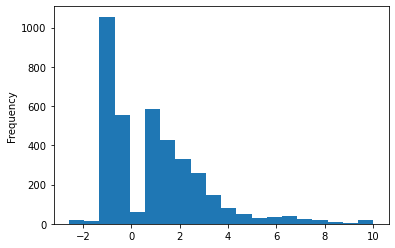

In [15]:
%matplotlib inline
datasets["ERBB2"]["y_train"].plot.hist(bins=20)

### Low learning rate experiment
With a signicantly lower learning rate the model can likely achieve higher accuracy, but at a great computational cost. The number of estimators with a lower learning rate is in the thousands instead of a few hundred. The gain in accuracy also seems to be quite low with the cross validated results for ESR1 being RMSE=1.1. However, if the model below could run to 10000 it might have found an even lower minimum though it improves very slowly.

In [19]:
ESR1_train = xgb.DMatrix(datasets["ESR1"]["X_train"], label=datasets["ESR1"]["y_train"])

In [20]:
ESR1_test = xgb.DMatrix(datasets["ESR1"]["X_test"], label=datasets["ESR1"]["y_test"])

In [26]:
params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "reg:squarederror",
    "subsample": 0.5
}
model_train = xgb.train(params, ESR1_train, 10000, evals = [(ESR1_test, "test")], verbose_eval=100)

[0]	test-rmse:2.12323
[100]	test-rmse:1.95993
[200]	test-rmse:1.82963
[300]	test-rmse:1.72123
[400]	test-rmse:1.63695
[500]	test-rmse:1.56433
[600]	test-rmse:1.50471
[700]	test-rmse:1.45359
[800]	test-rmse:1.41119
[900]	test-rmse:1.37473
[1000]	test-rmse:1.34469
[1100]	test-rmse:1.31744
[1200]	test-rmse:1.29311
[1300]	test-rmse:1.27130
[1400]	test-rmse:1.25286
[1500]	test-rmse:1.23705
[1600]	test-rmse:1.22192
[1700]	test-rmse:1.20933
[1800]	test-rmse:1.19803
[1900]	test-rmse:1.18786
[2000]	test-rmse:1.17840
[2100]	test-rmse:1.17022
[2200]	test-rmse:1.16299
[2300]	test-rmse:1.15617
[2400]	test-rmse:1.14933
[2500]	test-rmse:1.14301
[2600]	test-rmse:1.13778
[2700]	test-rmse:1.13258
[2800]	test-rmse:1.12795
[2900]	test-rmse:1.12396
[3000]	test-rmse:1.12028
[3100]	test-rmse:1.11697
[3200]	test-rmse:1.11389
[3300]	test-rmse:1.11130
[3400]	test-rmse:1.10911
[3500]	test-rmse:1.10674
[3600]	test-rmse:1.10465
[3700]	test-rmse:1.10216
[3800]	test-rmse:1.10012
[3900]	test-rmse:1.09821
[4000]	test-

KeyboardInterrupt: 

## Tuning

In [56]:
# The base model used for tuning
xgb1 = xgb.XGBRegressor(objective="reg:squarederror", 
                   seed=1, 
                   learning_rate=0.03, 
                   n_estimators=1000, 
                   n_jobs=80, max_depth=3, 
                   colsample_bytree=1,
                   subsample=1, verbosity=0, silent=True)

In [62]:
param_test1 = {
   'learning_rate' : [0.03, 0.05, 0.07],
    'max_depth' : [3,5,7],
    'min_child_weight' : [1, 3, 5, 7]
}

In [64]:
results = {}
for gene in genes:
    print(f"STARTING SEARCH FOR {gene.upper()}")
    print("===========================================================")
    GS1 = XGBGridSearch(xgb1, param_test1, cv=5)
    X = datasets[gene]["X_train"]
    Y = datasets[gene]["y_train"]
    GS1.fit(X, Y)
    results[gene] = GS1

STARTING SEARCH FOR ESR1
Fitting 5 folds for each of 36 candidates, totalling 180 fits.
Fitting candidate 1 of 36
    learning_rate : 0.03     max_depth : 3     min_child_weight : 1 
    Test Result: 1.0889     std: 0.0434       n iter: 1000
    Train Result: 0.3447     std: 0.0088
    elapsed time: 0:33, 5 fold time: 0:33
    time left: 19: 8



Fitting candidate 2 of 36
    learning_rate : 0.03     max_depth : 3     min_child_weight : 3 
    Test Result: 1.0847     std: 0.0447       n iter: 1000
    Train Result: 0.3400     std: 0.0095
    elapsed time: 1: 6, 5 fold time: 0:33
    time left: 18:47



Fitting candidate 3 of 36
    learning_rate : 0.03     max_depth : 3     min_child_weight : 5 
    Test Result: 1.0840     std: 0.0412       n iter: 1000
    Train Result: 0.3438     std: 0.0049
    elapsed time: 1:40, 5 fold time: 0:33
    time left: 18:16



Fitting candidate 4 of 36
    learning_rate : 0.03     max_depth : 3     min_child_weight : 7 
    Test Result: 1.0952     std: 0

    learning_rate : 0.07     max_depth : 5     min_child_weight : 7 
    Test Result: 1.0752     std: 0.0454       n iter: 418
    Train Result: 0.0704     std: 0.0059
    elapsed time: 19:36, 5 fold time: 0:26
    time left: 2:27



Fitting candidate 33 of 36
    learning_rate : 0.07     max_depth : 7     min_child_weight : 1 
    Test Result: 1.1150     std: 0.0671       n iter: 653
    Train Result: 0.0006     std: 0.0000
    elapsed time: 20:23, 5 fold time: 0:47
    time left: 1:51



Fitting candidate 34 of 36
    learning_rate : 0.07     max_depth : 7     min_child_weight : 3 
    Test Result: 1.1154     std: 0.0571       n iter: 510
    Train Result: 0.0021     std: 0.0004
    elapsed time: 21: 4, 5 fold time: 0:41
    time left: 1:14



Fitting candidate 35 of 36
    learning_rate : 0.07     max_depth : 7     min_child_weight : 5 
    Test Result: 1.0979     std: 0.0580       n iter: 171
    Train Result: 0.0845     std: 0.0076
    elapsed time: 21:21, 5 fold time: 0:18
    ti

    learning_rate : 0.07     max_depth : 3     min_child_weight : 5 
    Test Result: 1.2571     std: 0.0292       n iter: 162
    Train Result: 0.8930     std: 0.0093
    elapsed time: 10:31, 5 fold time: 0:10
    time left: 3:30



Fitting candidate 28 of 36
    learning_rate : 0.07     max_depth : 3     min_child_weight : 7 
    Test Result: 1.2642     std: 0.0362       n iter: 175
    Train Result: 0.8757     std: 0.0124
    elapsed time: 10:42, 5 fold time: 0:11
    time left: 3: 3



Fitting candidate 29 of 36
    learning_rate : 0.07     max_depth : 5     min_child_weight : 1 
    Test Result: 1.2612     std: 0.0374       n iter: 90
    Train Result: 0.6962     std: 0.0193
    elapsed time: 10:53, 5 fold time: 0:11
    time left: 2:38



Fitting candidate 30 of 36
    learning_rate : 0.07     max_depth : 5     min_child_weight : 3 
    Test Result: 1.2599     std: 0.0343       n iter: 179
    Train Result: 0.4679     std: 0.0107
    elapsed time: 11:10, 5 fold time: 0:17
    tim

    learning_rate : 0.05     max_depth : 7     min_child_weight : 3 
    Test Result: 1.1784     std: 0.1194       n iter: 378
    Train Result: 0.0019     std: 0.0008
    elapsed time: 7:18, 5 fold time: 0:19
    time left: 4:39



Fitting candidate 23 of 36
    learning_rate : 0.05     max_depth : 7     min_child_weight : 5 
    Test Result: 1.1739     std: 0.0936       n iter: 676
    Train Result: 0.0008     std: 0.0004
    elapsed time: 7:48, 5 fold time: 0:30
    time left: 4:25



Fitting candidate 24 of 36
    learning_rate : 0.05     max_depth : 7     min_child_weight : 7 
    Test Result: 1.1610     std: 0.0726       n iter: 1000
    Train Result: 0.0006     std: 0.0002
    elapsed time: 8:31, 5 fold time: 0:43
    time left: 4:15



Fitting candidate 25 of 36
    learning_rate : 0.07     max_depth : 3     min_child_weight : 1 
    Test Result: 1.0919     std: 0.0997       n iter: 286
    Train Result: 0.1250     std: 0.0076
    elapsed time: 8:39, 5 fold time: 0: 8
    time 

    learning_rate : 0.05     max_depth : 5     min_child_weight : 1 
    Test Result: 1.0145     std: 0.0282       n iter: 110
    Train Result: 0.6082     std: 0.0137
    elapsed time: 4:40, 5 fold time: 0:11
    time left: 5:12



Fitting candidate 18 of 36
    learning_rate : 0.05     max_depth : 5     min_child_weight : 3 
    Test Result: 1.0129     std: 0.0266       n iter: 137
    Train Result: 0.5547     std: 0.0108
    elapsed time: 4:52, 5 fold time: 0:13
    time left: 4:52



Fitting candidate 19 of 36
    learning_rate : 0.05     max_depth : 5     min_child_weight : 5 
    Test Result: 1.0140     std: 0.0278       n iter: 183
    Train Result: 0.4788     std: 0.0092
    elapsed time: 5: 7, 5 fold time: 0:15
    time left: 4:35



Fitting candidate 20 of 36
    learning_rate : 0.05     max_depth : 5     min_child_weight : 7 
    Test Result: 1.0121     std: 0.0258       n iter: 138
    Train Result: 0.5660     std: 0.0121
    elapsed time: 5:20, 5 fold time: 0:13
    time l

In [145]:
r = results["ESR1"].results

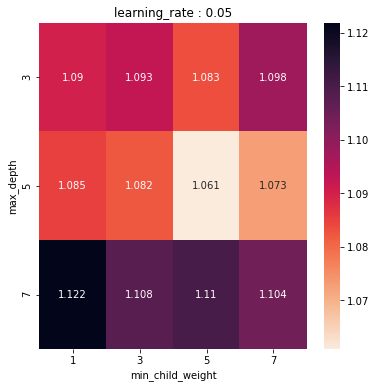

In [150]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.heatmap(r[1], annot=True,
                        yticklabels=param_test1["max_depth"],
                        xticklabels=param_test1["min_child_weight"],
                         fmt='.4g', 
                         cmap=sns.cm.rocket_r)
ax.set_ylabel("max_depth")
ax.set_xlabel("min_child_weight")
ax.set_title(f"learning_rate : {param_test1['learning_rate'][1]}")


plt.show()

In [161]:
def get_best_params(model):
    print("    Learning_rate:    ",model._best_params["learning_rate"])
    print("    max_depth:        ",model._best_params["max_depth"])
    print("    min_child_weight: ",model._best_params["min_child_weight"])

#### The best parameters for each gene after the coarse search

In [162]:
for gene in genes:
    print(f"{gene.upper()}:")
    get_best_params(results[gene])
    print(f"    best score: {results[gene]._best_score}")

ESR1:
    Learning_rate:     0.05
    max_depth:         5
    min_child_weight:  5
    best score: 1.0609126
ERBB2:
    Learning_rate:     0.03
    max_depth:         5
    min_child_weight:  5
    best score: 1.2534399999999999
CDK1:
    Learning_rate:     0.07
    max_depth:         3
    min_child_weight:  7
    best score: 1.0793371999999999
CDK4:
    Learning_rate:     0.05
    max_depth:         3
    min_child_weight:  5
    best score: 1.0110366


# Fine tuning

### ESR1

In [166]:
param_test_ESR1 = {
    "learning_rate" : [0.002, 0.008, 0.01],
    "max_depth" : [3, 4, 5, 6],
    "min_child_weight" : [2, 3, 4, 5, 6]
}

In [185]:
GS_ESR1 = XGBGridSearch(xgb1, param_test_ESR1, cv=5)
X = datasets["ESR1"]["X_train"]
Y = datasets["ESR1"]["y_train"]
GS_ESR1.fit(X, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits.
Fitting candidate 1 of 27
    learning_rate : 0.04     max_depth : 4     min_child_weight : 4 
    Test Result: 1.0869     std: 0.0838       n iter: 494
    Train Result: 0.2561     std: 0.0104

    elapsed time: 0:40, 5 fold time: 0:40
    time left: 17:23



Fitting candidate 2 of 27
    learning_rate : 0.04     max_depth : 4     min_child_weight : 5 
    Test Result: 1.0772     std: 0.0775       n iter: 556
    Train Result: 0.2315     std: 0.0087

    elapsed time: 1:24, 5 fold time: 0:44
    time left: 17:33



Fitting candidate 3 of 27
    learning_rate : 0.04     max_depth : 4     min_child_weight : 6 
    Test Result: 1.0857     std: 0.0831       n iter: 619
    Train Result: 0.2085     std: 0.0081

    elapsed time: 2:12, 5 fold time: 0:48
    time left: 17:38



Fitting candidate 4 of 27
    learning_rate : 0.04     max_depth : 5     min_child_weight : 4 
    Test Result: 1.0926     std: 0.0897       n iter: 320
 

array([[[1.086913 , 1.0771684, 1.0856828],
        [1.0926478, 1.0864948, 1.0876948],
        [1.1162306, 1.1161928, 1.1088026]],

       [[1.0816768, 1.0831562, 1.0861786],
        [1.0942084, 1.092819 , 1.091935 ],
        [1.1131416, 1.1129282, 1.11859  ]],

       [[1.0822082, 1.0780404, 1.0785066],
        [1.0935046, 1.084495 , 1.0966552],
        [1.114132 , 1.1108054, 1.1125692]]])

In [186]:
GS_ESR1._best_score

1.0771684000000001

In [187]:
get_best_params(GS_ESR1)

    Learning_rate:     0.04
    max_depth:         4
    min_child_weight:  5


### ERBB2


In [188]:
param_test_ERBB2 = {
    "learning_rate" : [0.02, 0.03, 0.04],
    "max_depth" : [4, 5, 6],
    "min_child_weight" : [4, 5, 6]
}

In [189]:
GS_ERBB2 = XGBGridSearch(xgb1, param_test_ERBB2, cv=5)
X = datasets["ERBB2"]["X_train"]
Y = datasets["ERBB2"]["y_train"]
GS_ERBB2.fit(X, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits.
Fitting candidate 1 of 27
    learning_rate : 0.02     max_depth : 4     min_child_weight : 4 
    Test Result: 1.2472     std: 0.0433       n iter: 529
    Train Result: 0.7150     std: 0.0116

    elapsed time: 0:52, 5 fold time: 0:52
    time left: 22:26



Fitting candidate 2 of 27
    learning_rate : 0.02     max_depth : 4     min_child_weight : 5 
    Test Result: 1.2477     std: 0.0475       n iter: 537
    Train Result: 0.7131     std: 0.0116

    elapsed time: 1:44, 5 fold time: 0:52
    time left: 21:39



Fitting candidate 3 of 27
    learning_rate : 0.02     max_depth : 4     min_child_weight : 6 
    Test Result: 1.2506     std: 0.0476       n iter: 407
    Train Result: 0.7911     std: 0.0106

    elapsed time: 2:26, 5 fold time: 0:42
    time left: 19:26



Fitting candidate 4 of 27
    learning_rate : 0.02     max_depth : 5     min_child_weight : 4 
    Test Result: 1.2497     std: 0.0475       n iter: 504
 

array([[[1.2471612, 1.2476714, 1.2506022],
        [1.2497324, 1.2469806, 1.2447368],
        [1.244046 , 1.2391032, 1.2458712]],

       [[1.2461772, 1.2475256, 1.2500908],
        [1.2453734, 1.2485238, 1.2462764],
        [1.2441536, 1.2409586, 1.2483748]],

       [[1.2477356, 1.2486928, 1.2502862],
        [1.2464464, 1.2481086, 1.2506102],
        [1.2453188, 1.2487146, 1.2488696]]])

In [190]:
GS_ERBB2._best_score

1.2391032000000002

In [198]:
get_best_params(GS_ERBB2)

    Learning_rate:     0.02
    max_depth:         6
    min_child_weight:  5


### CDK4

In [192]:
param_test_CDK4 = {
    "learning_rate" : [0.04, 0.05, 0.06],
    "max_depth" : [2, 3, 4],
    "min_child_weight" : [4, 5, 6]
}

In [193]:
GS_CDK4 = XGBGridSearch(xgb1, param_test_CDK4, cv=5)
X = datasets["ERBB2"]["X_train"]
Y = datasets["ERBB2"]["y_train"]
GS_CDK4.fit(X, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits.
Fitting candidate 1 of 27
    learning_rate : 0.04     max_depth : 2     min_child_weight : 4 
    Test Result: 1.2642     std: 0.0385       n iter: 538
    Train Result: 0.9356     std: 0.0072

    elapsed time: 0:30, 5 fold time: 0:30
    time left: 12:54



Fitting candidate 2 of 27
    learning_rate : 0.04     max_depth : 2     min_child_weight : 5 
    Test Result: 1.2651     std: 0.0393       n iter: 424
    Train Result: 0.9810     std: 0.0076

    elapsed time: 0:54, 5 fold time: 0:24
    time left: 11:18



Fitting candidate 3 of 27
    learning_rate : 0.04     max_depth : 2     min_child_weight : 6 
    Test Result: 1.2660     std: 0.0384       n iter: 531
    Train Result: 0.9384     std: 0.0061

    elapsed time: 1:24, 5 fold time: 0:30
    time left: 11:11



Fitting candidate 4 of 27
    learning_rate : 0.04     max_depth : 3     min_child_weight : 4 
    Test Result: 1.2532     std: 0.0431       n iter: 396
 

array([[[1.2642074, 1.2651386, 1.2659778],
        [1.2532082, 1.2545066, 1.2512548],
        [1.2477356, 1.2486928, 1.2502862]],

       [[1.264482 , 1.2651654, 1.2679814],
        [1.2550032, 1.2532502, 1.255223 ],
        [1.2465514, 1.2560804, 1.2539526]],

       [[1.2641636, 1.2639614, 1.2649286],
        [1.2581212, 1.2531802, 1.2530012],
        [1.2458494, 1.2491978, 1.2506916]]])

In [194]:
GS_CDK4._best_score

1.2458494000000002

In [195]:
get_best_params(GS_CDK4)

    Learning_rate:     0.06
    max_depth:         4
    min_child_weight:  4


### CDK1

In [ ]:
param_test_CDK1 = {
    "learning_rate" : [0.06, 0.07, 0.08],
    "max_depth" : [2, 3, 4],
    "min_child_weight" : [6, 7, 8]
}

In [ ]:
GS_CDK1 = XGBGridSearch(xgb1, param_test_CDK1, cv=5)
X = datasets[gene]["X_train"]
Y = datasets[gene]["y_train"]
GS_CDK1.fit(X, Y)